# Data loaders

## Parallel sentences

In [1]:
from datasets import load_dataset, splits

In [2]:
train_dataset = load_dataset(
    "../../garland/cai_garland/data/parallel_dataset_loader_hf.py",
    "raw_no_dict_no_splits",
    split=splits.Split.TRAIN)

Reusing dataset parallel_dataset_loader_hf (/home/eeisenst/.cache/huggingface/datasets/parallel_dataset_loader_hf/raw_no_dict_no_splits/0.1.1/a8aa547420fc6f035d831094bb57ad0e6038b6250b0d8d3c91f90773dea52224)


In [3]:
len(train_dataset)

109542

# UMAP experiments

In [1]:
import torch
import unicodedata
import umap
import umap.plot

from tqdm.auto import tqdm

import matplotlib
from transformers import AutoTokenizer, AutoModelForMaskedLM

from cai_garland.models.factory import make_encoder

%matplotlib inline

## English UMAP

In [169]:
# model_name, model_key = "roberta-base", "roberta"
# model_name, model_key = "roberta-large", "roberta"

# model_name, model_key = "albert-base-v2", "albert"
model_name, model_key = "albert-xxlarge-v2", "albert"

In [170]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

albert-xxlarge-v2


<AxesSubplot:title={'center':'Colored by approx local dimension'}>

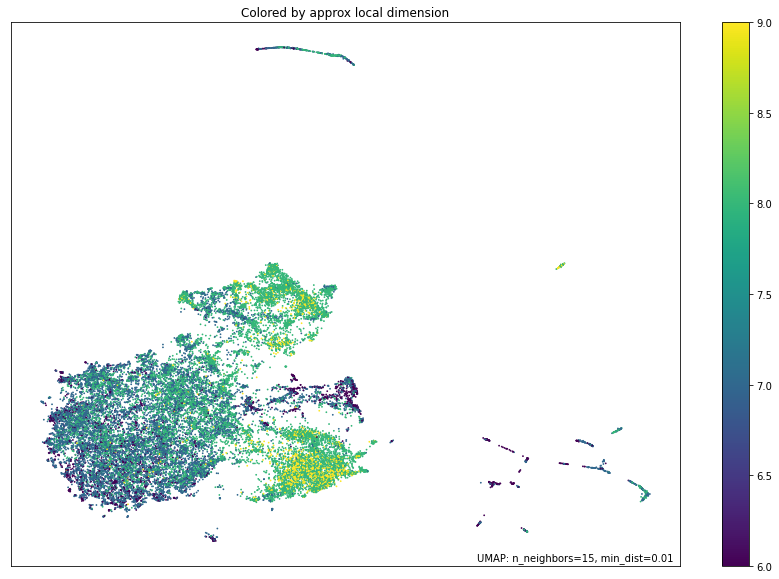

In [172]:
print(model_name)
embeddings_base = getattr(model, model_key).embeddings.word_embeddings.weight.detach().numpy()
umapper = umap.UMAP(
    random_state=42,
    # n_neighbors=40,
    min_dist=0.01,
    metric="cosine"
    # densmap=True,
    # dens_lambda=1.0
).fit(embeddings_base)
ax = umap.plot.diagnostic(umapper, diagnostic_type='local_dim')
ax.figure.set_size_inches(15, 10)
ax

albert-base-v2


<AxesSubplot:title={'center':'Colored by approx local dimension'}>

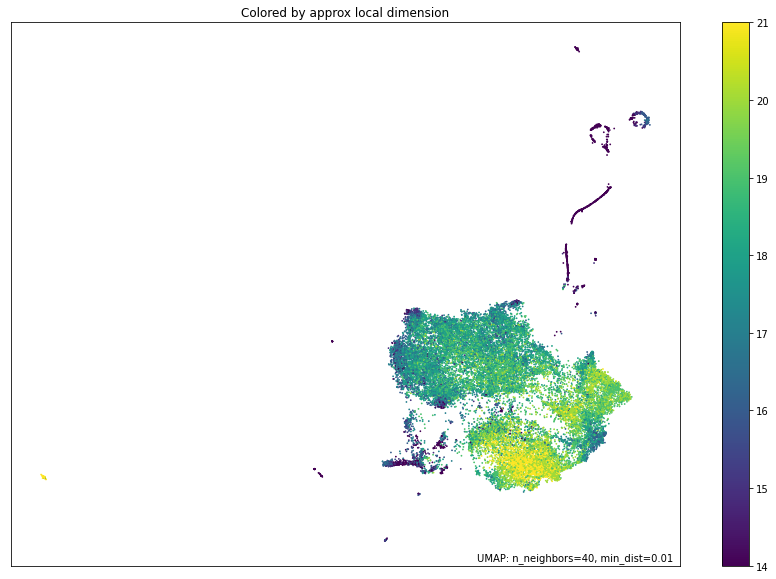

In [168]:
print(model_name)
embeddings_base = getattr(model, model_key).embeddings.word_embeddings.weight.detach().numpy()
umapper = umap.UMAP(
    random_state=42,
    n_neighbors=40,
    min_dist=0.01,
    metric="cosine"
    # densmap=True,
    # dens_lambda=1.0
).fit(embeddings_base)
ax = umap.plot.diagnostic(umapper, diagnostic_type='local_dim')
ax.figure.set_size_inches(15, 10)
ax

roberta-base


<AxesSubplot:title={'center':'Colored by approx local dimension'}>

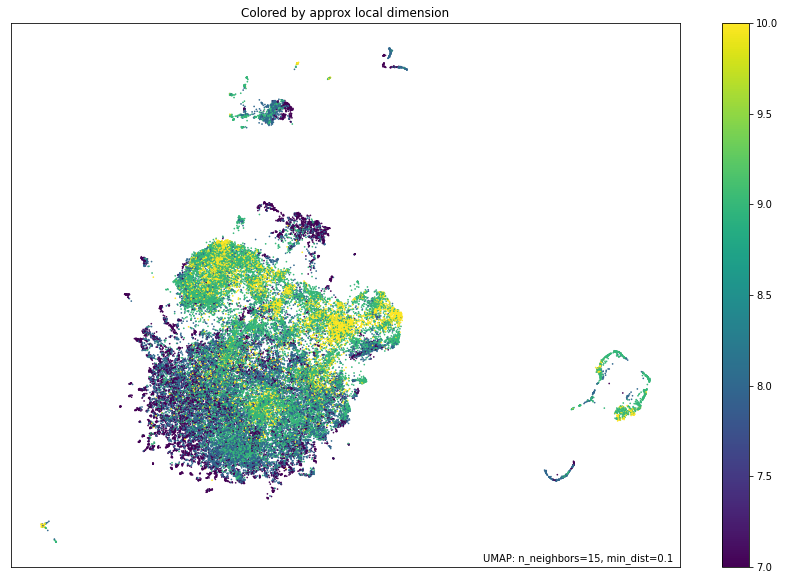

In [151]:
print(model_name)
embeddings_base = getattr(model, model_key).embeddings.word_embeddings.weight.detach().numpy()
umapper = umap.UMAP(
    random_state=42,
    # n_neighbors=25,
    # min_dist=0.01,
    metric="cosine"
    # densmap=True,
    # dens_lambda=1.0
).fit(embeddings_base)
ax = umap.plot.diagnostic(umapper, diagnostic_type='local_dim')
ax.figure.set_size_inches(15, 10)
ax

roberta-large


<AxesSubplot:title={'center':'Colored by approx local dimension'}>

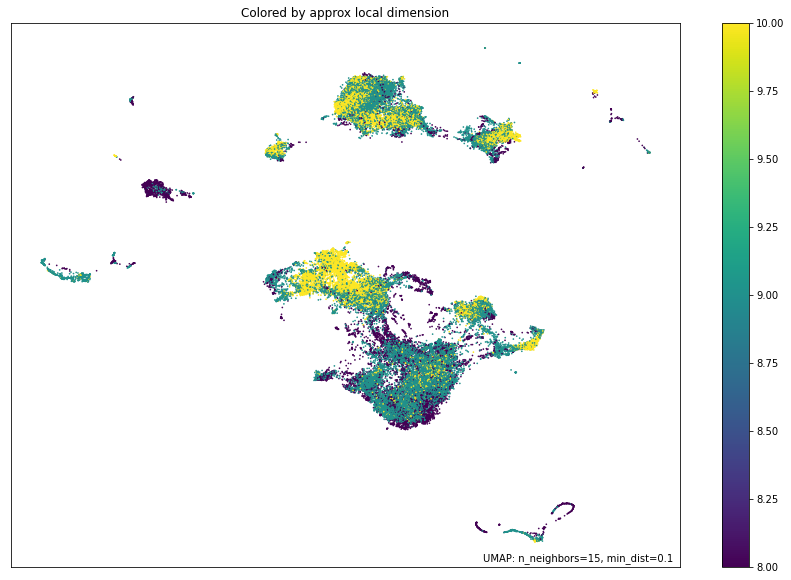

In [154]:
print(model_name)
embeddings_base = getattr(model, model_key).embeddings.word_embeddings.weight.detach().numpy()
umapper = umap.UMAP(
    random_state=42,
    # n_neighbors=25,
    # min_dist=0.05,
    metric="cosine"
    # densmap=True,
    # dens_lambda=1.0
).fit(embeddings_base)
ax = umap.plot.diagnostic(umapper, diagnostic_type='local_dim')
ax.figure.set_size_inches(15, 10)
ax

## Chinese UMAP

In [129]:
# model_name = "hfl/chinese-macbert-base"
# model_name = "hfl/chinese-roberta-wwm-ext"
# model_name = "uer/chinese_roberta_L-12_H-768"
model_name = "uer/roberta-base-wwm-chinese-cluecorpussmall"

# model_name = "hfl/chinese-bert-wwm"
# model_name = "hfl/chinese-bert-wwm-ext"

In [130]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

In [131]:
vocab = list(tokenizer.vocab.keys())
chars = sorted(list(set([c for word in vocab for c in word])))
chinese_chars = set([c for c in chars if unicodedata.name(c).startswith("CJK UNIFIED IDEOGRAPH-")] + ["#"])
chinese_tokens = set(filter(lambda x: all([c in chinese_chars for c in x]), vocab))
len(chinese_tokens), len(vocab), len(chinese_tokens) / len(vocab)

(14646, 21128, 0.6932033320711851)

In [132]:
chinese_token_idxs = [i for i, t in enumerate(vocab) if t in chinese_tokens]

uer/roberta-base-wwm-chinese-cluecorpussmall


<AxesSubplot:title={'center':'Colored by approx local dimension'}>

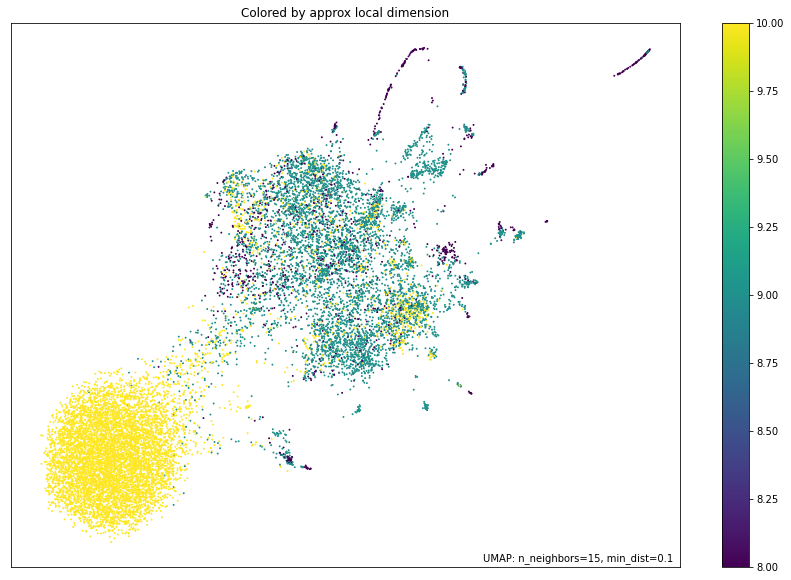

In [133]:
print(model_name)
embeddings_base = model.bert.embeddings.word_embeddings.weight.detach().numpy()[chinese_token_idxs,:]
umapper = umap.UMAP(
    random_state=42,
    # n_neighbors=25,
    # min_dist=0.05,
    metric="cosine"
    # densmap=True,
    # dens_lambda=1.0
).fit(embeddings_base)
ax = umap.plot.diagnostic(umapper, diagnostic_type='local_dim')
ax.figure.set_size_inches(15, 10)
ax

hfl/chinese-roberta-wwm-ext


<AxesSubplot:title={'center':'Colored by approx local dimension'}>

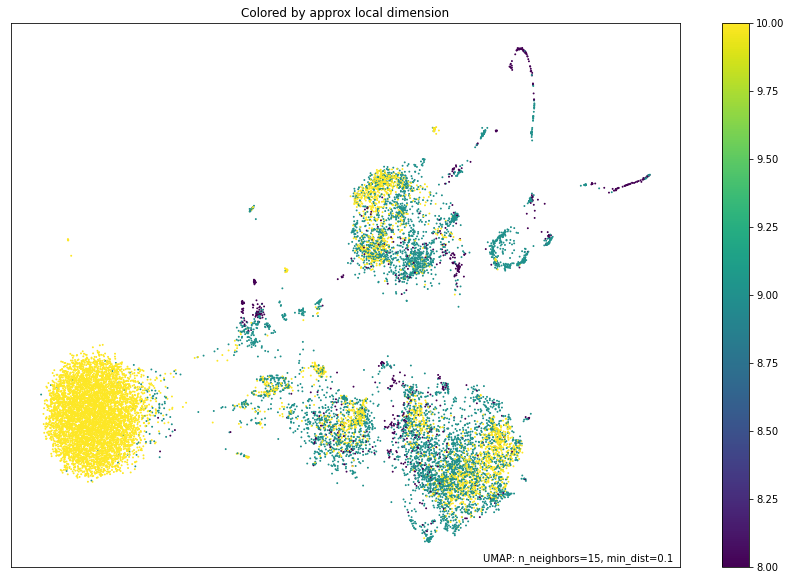

In [128]:
print(model_name)
embeddings_base = model.bert.embeddings.word_embeddings.weight.detach().numpy()[chinese_token_idxs,:]
umapper = umap.UMAP(
    random_state=42,
    # n_neighbors=25,
    # min_dist=0.05,
    metric="cosine"
    # densmap=True,
    # dens_lambda=1.0
).fit(embeddings_base)
ax = umap.plot.diagnostic(umapper, diagnostic_type='local_dim')
ax.figure.set_size_inches(15, 10)
ax

## Tibetan UMAP

Some weights of the model checkpoint at /home/eeisenst/workspace/compassionai/data-registry/champion_models/albert-olive-cormorant/base/base.bin were not used when initializing AlbertModel: ['predictions.LayerNorm.bias', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'sop_classifier.classifier.bias', 'predictions.decoder.bias', 'predictions.bias', 'predictions.dense.weight', 'sop_classifier.classifier.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<AxesSubplot:title={'center':'Colored by approx local dimension'}>

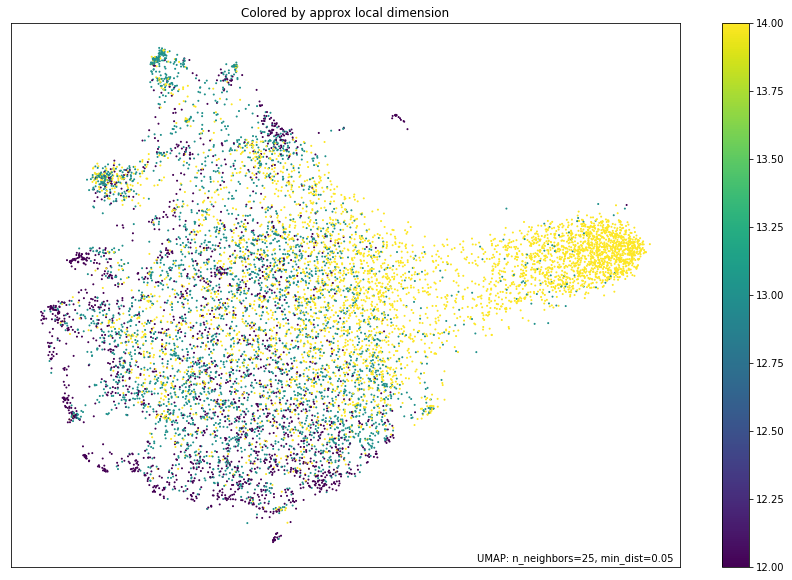

In [2]:
tibetan_mdl, tokenizer = make_encoder("cai:albert-olive-cormorant/base")
embeddings_base = tibetan_mdl.embeddings.word_embeddings.weight.detach().numpy()
standard_embedding_base = umap.UMAP(
    random_state=42,
    n_neighbors=25,
    min_dist=0.05,
    metric="cosine"
    # densmap=True,
    # dens_lambda=1.0
).fit(embeddings_base)
ax = umap.plot.diagnostic(standard_embedding_base, diagnostic_type='local_dim')
ax.figure.set_size_inches(15, 10)
ax

Some weights of the model checkpoint at /home/eeisenst/workspace/compassionai/data-registry/champion_models/albert-olive-cormorant/base-intermediate/pytorch_model.bin were not used when initializing AlbertModel: ['predictions.bias', 'sop_classifier.classifier.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.dense.bias', 'sop_classifier.classifier.bias', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<AxesSubplot:title={'center':'Colored by approx local dimension'}>

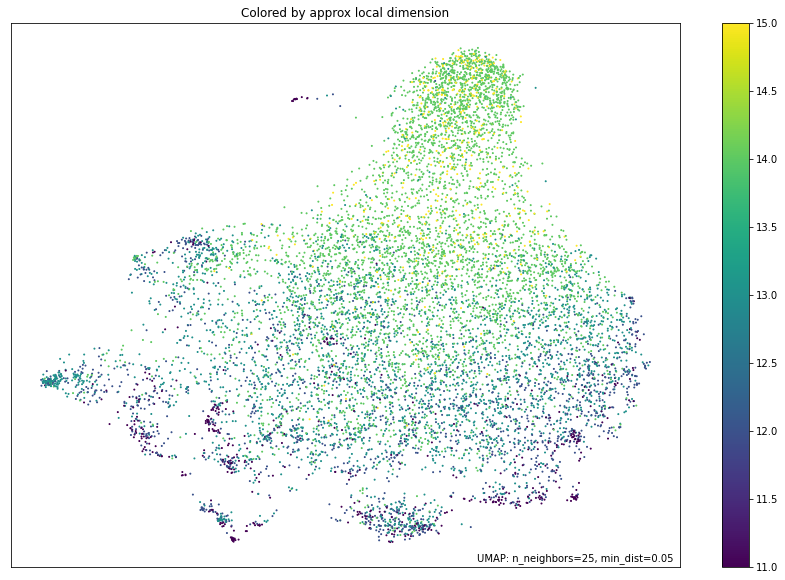

In [3]:
tibetan_mdl, tokenizer = make_encoder("cai:albert-olive-cormorant/base-intermediate")
embeddings_interm = tibetan_mdl.embeddings.word_embeddings.weight.detach().numpy()
standard_embedding_interm = umap.UMAP(
    random_state=42,
    n_neighbors=25,
    min_dist=0.05,
    metric="cosine"
    # densmap=True,
    # dens_lambda=1.0
).fit(embeddings_interm)
ax = umap.plot.diagnostic(standard_embedding_interm, diagnostic_type='local_dim')
ax.figure.set_size_inches(15, 10)
ax

## UMAP + PoS tags

In [5]:
from cai_common.datasets import TokenTagDataset

In [3]:
tibetan_mdl, tokenizer = make_encoder("cai:albert-olive-cormorant/base-intermediate")
tokenizer.stochastic_tokenization = False
tokenizer.tsheg_pretokenization = False

Some weights of the model checkpoint at /home/eeisenst/workspace/compassionai/data-registry/champion_models/albert-olive-cormorant/base-intermediate/pytorch_model.bin were not used when initializing AlbertModel: ['predictions.LayerNorm.bias', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'sop_classifier.classifier.bias', 'predictions.decoder.bias', 'predictions.bias', 'predictions.dense.weight', 'sop_classifier.classifier.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
dataset = TokenTagDataset(
    tokenizer=tokenizer,
    processed_dataset="part-of-speech-olive",
    verbose=True,
    tqdm=tqdm)

Example:   0%|          | 0/31309 [00:00<?, ?it/s]

In [11]:
token_tag_counts = {}
for row in dataset:
    for token, label in zip(row['input_ids'], row['labels']):
        token_tag_counts[token] = token_tag_counts.get(token, {})
        token_tag_counts[token][label] = token_tag_counts[token].get(label, 0) + 1

In [79]:
tag_freqs = {}
for token, tag_counts in token_tag_counts.items():
    for tag, count in tag_counts.items():
        tag_freqs[tag] = tag_freqs.get(tag, 0) + count
tag_freqs = {
    key: val / sum(tag_freqs.values())
    for key, val in tag_freqs.items()
}
sum([1 for x in tag_freqs.values() if x > 0.05])

7

In [39]:
import numpy as np
import pandas as pd

In [26]:
tibetan_mdl, tokenizer = make_encoder("cai:albert-olive-cormorant/base")
embeddings_base = tibetan_mdl.embeddings.word_embeddings.weight.detach().numpy()

Some weights of the model checkpoint at /home/eeisenst/workspace/compassionai/data-registry/champion_models/albert-olive-cormorant/base/base.bin were not used when initializing AlbertModel: ['predictions.LayerNorm.bias', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'sop_classifier.classifier.bias', 'predictions.decoder.bias', 'predictions.bias', 'predictions.dense.weight', 'sop_classifier.classifier.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [34]:
umapper = umap.UMAP(
    random_state=42,
    n_neighbors=25,
    min_dist=0.05,
    metric="cosine"
    # densmap=True,
    # dens_lambda=1.0
).fit(embeddings_base)

<AxesSubplot:title={'center':'Colored by approx local dimension'}>

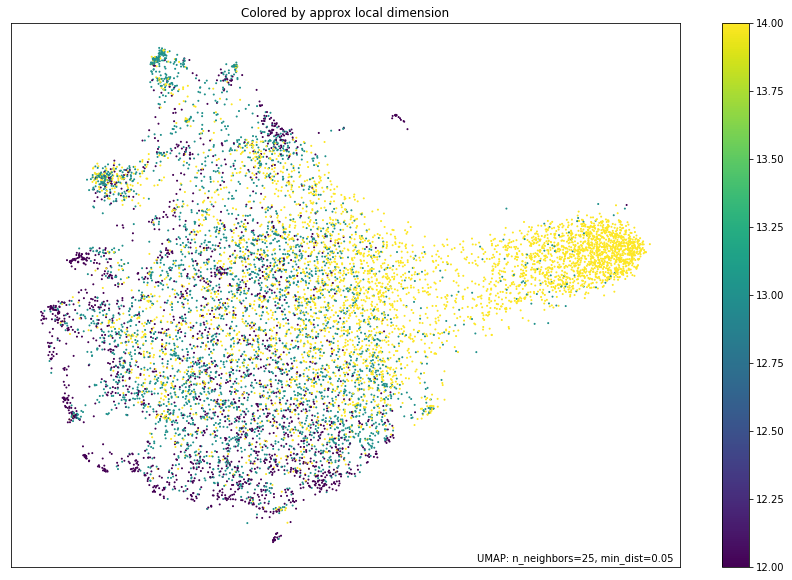

In [37]:
ax = umap.plot.diagnostic(umapper, diagnostic_type='local_dim')
ax.figure.set_size_inches(15, 10)
ax

In [81]:
label_threshold = 0

label_range = max(set([l for ex in dataset for l in ex['labels']])) + 1

token_labels = {}
for token, tag_counts in token_tag_counts.items():
    token_range = np.zeros(label_range)
    for tag, count in tag_counts.items():
        token_range[tag] = count
    token_range = token_range / token_range.sum()
    candidate_label = np.argmax(token_range)
    if token_range[candidate_label] > label_threshold and tag_freqs[candidate_label] > 0.05:
        token_labels[token] = candidate_label
    else:
        token_labels[token] = -1

In [82]:
embeddings_labels = np.array([token_labels.get(x, -1) for x in range(len(embeddings_base))])

In [83]:
(embeddings_labels == -1).sum() / len(embeddings_labels)

0.551

In [87]:
umapper = umap.UMAP(
    random_state=42,
    n_neighbors=25,
    min_dist=0.05,
    metric="cosine"
    # densmap=True,
    # dens_lambda=1.0
).fit(embeddings_base[embeddings_labels != -1])

<AxesSubplot:>

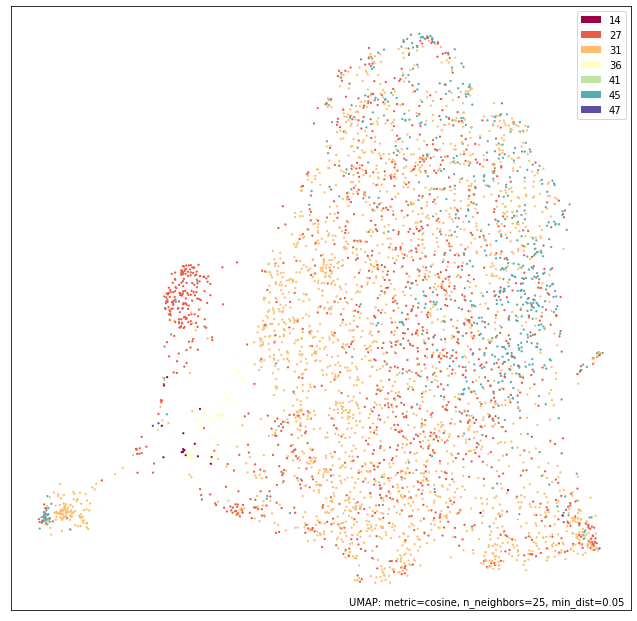

In [88]:
umap.plot.points(umapper, labels=embeddings_labels[embeddings_labels != -1])

## PoS tagging

In [4]:
from cai_manas.part_of_speech.pos_tagger import PartOfSpeechTagger
from cai_common.dict.dict import TibetanDict, TibetanEncoding

In [5]:
tagger = PartOfSpeechTagger("part-of-speech-intersyllabic-olive-cormorant")

In [6]:
dict_ = TibetanDict(default_encoding=TibetanEncoding.UNICODE)

In [26]:
ex_idx = 0

In [43]:
tag_res = tagger.tag(train_dataset[ex_idx]['tibetan'])

print(train_dataset[ex_idx]['tibetan'])
print(train_dataset[ex_idx]['english'])
print(tag_res)

word_set = {'NOUN', 'VERB', 'ADJ'}

for word, tag in zip(tag_res['words'], tag_res['tags']):
    if tag in word_set:
        print(word, tag)
        print(dict_[word])

ex_idx += 1

རབ་འབྱོར་བྱང་ཆུབ་སེམས་དཔའ་སེམས་དཔའ་ཆེན་པོ་གང་དག་སྔོན་བླ་ན་མེད་པ་ཡང་དག་པར་རྫོགས་པའི་བྱང་ཆུབ་ཏུ་སྤྱོད་པ་སྤྱད་པ་དག་དང་། སྔོན་གྱི་ཡང་དག་པར་རྫོགས་པའི་སངས་རྒྱས་དག་གི་དྲུང་དུ་ཚངས་པར་སྤྱོད་པ་སྤྱད་པ་དག་དང་།
sudbhuti, those great bodhisattva beings who formerly worked toward unsurpassed, genuinely perfect enlightenment, who have maintained purity of conduct in the presence of the genuinely perfect buddhas of the past,
{'words': ['[CLS] རབ་འབར་', 'བང་ཆབ་', 'སམས་དཔའ་སམས་དཔའ་', 'ཆན་པ་', 'གང་', 'དག་', 'སན་བ་', 'ན་', 'མད་པ་', 'ཡང་དག་པར་', 'རགས་པའ་བང་ཆབ་ཏ་', 'སད་པ་', 'སད་པ་', 'དག་', 'དང་', '།', 'སན་ག་', 'ཡང་དག་པར་', 'རགས་པའ་སངས་རས་', 'དག་', 'ག་', 'དང་', 'ད་', 'ཚངས་པར་', 'སད་པ་', 'སད་པ་', 'དག་', 'དང་', '།[SEP]'], 'tags': ['', 'NOUN', 'NOUN', 'NOUN', 'PART', 'PART', 'NOUN', 'ADP', 'NOUN', 'NOUN+PART', 'NOUN', 'VERB', 'VERB', 'PART', 'CCONJ', 'PUNCT', 'PROPN', 'NOUN+PART', 'NOUN', 'PART', 'PART', 'CCONJ', 'ADV', 'NOUN+PART', 'VERB', 'VERB', 'PART', 'CCONJ', 'PUNCT']}
བང་ཆབ་ NOUN
None
སམས་དཔའ་སམས་དཔའ་ NOU

## https://umap-learn.readthedocs.io/en/latest/mutual_nn_umap.html

In [2]:
from umap.umap_ import find_ab_params

min_dist = 0.1
a, b = find_ab_params(1.0, min_dist)

In [3]:
from sklearn.utils import check_random_state
random_state = check_random_state(42)

# Distance Metric to Use
metric = 'cosine'

# number of neighbors for computing k-neighbor graph
n_neighbors = 1000

# new number of neighbors to search for
new_n_neighbors = 1000

In [4]:
tibetan_mdl, tokenizer = make_encoder("cai:albert-olive-cormorant/base")
embeddings_base = tibetan_mdl.embeddings.word_embeddings.weight.detach().numpy()
X = embeddings_base

Some weights of the model checkpoint at /home/eeisenst/workspace/compassionai/data-registry/champion_models/albert-olive-cormorant/base/base.bin were not used when initializing AlbertModel: ['predictions.decoder.weight', 'predictions.dense.weight', 'sop_classifier.classifier.bias', 'predictions.LayerNorm.bias', 'predictions.decoder.bias', 'sop_classifier.classifier.weight', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
from umap.umap_ import nearest_neighbors

knn_indices, knn_dists, knn_search_index = nearest_neighbors(
    X,
    n_neighbors=n_neighbors,
    metric = metric,
    metric_kwds = {},
    angular=False,
    random_state = random_state,
    low_memory=True,
    use_pynndescent=True,
    n_jobs=1,
    verbose=True,
)

Thu Aug  4 12:02:08 2022 Finding Nearest Neighbors
Thu Aug  4 12:02:08 2022 Building RP forest with 10 trees
Thu Aug  4 12:02:08 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	Stopping threshold met -- exiting after 6 iterations
Thu Aug  4 12:02:54 2022 Finished Nearest Neighbor Search


In [6]:
def min_spanning_tree(knn_indices, knn_dists, n_neighbors, threshold):
  
  rows = np.zeros(knn_indices.shape[0] * n_neighbors, dtype=np.int32)
  cols = np.zeros(knn_indices.shape[0] * n_neighbors, dtype=np.int32)
  vals = np.zeros(knn_indices.shape[0] * n_neighbors, dtype=np.float32)
  
  pos = 0
  for i, indices in enumerate(knn_indices):
    for j, index in enumerate(indices[:threshold]):
      if index == -1:
        continue
      rows[pos] = i 
      cols[pos] = index
      vals[pos] = knn_dists[i][j]
      pos += 1
  
  matrix = scipy.sparse.csr_matrix((vals, (rows, cols)), shape=(knn_indices.shape[0], knn_indices.shape[0]))
  Tcsr = scipy.sparse.csgraph.minimum_spanning_tree(matrix)
  
  Tcsr = scipy.sparse.coo_matrix(Tcsr)
  weights_tuples = zip(Tcsr.row, Tcsr.col, Tcsr.data)
  

  sorted_weights_tuples = sorted(weights_tuples, key=lambda tup: tup[2])
  
  return sorted_weights_tuples 

In [7]:
import copy
import heapq

def create_connected_graph(mutual_nn, total_mutual_nn, knn_indices, knn_dists, n_neighbors, connectivity):
  connected_mnn = copy.deepcopy(mutual_nn)
  
  if connectivity == "nearest":
    for i in range(len(knn_indices)): 
      if len(mutual_nn[i]) == 0:
        first_nn = knn_indices[i][1]
        if first_nn != -1:
          connected_mnn[i].add(first_nn) 
          connected_mnn[first_nn].add(i) 
          total_mutual_nn += 1
    return connected_mnn

            
      
  #Create graph for mutual NN
  rows = np.zeros(total_mutual_nn, dtype=np.int32)
  cols = np.zeros(total_mutual_nn, dtype=np.int32)
  vals = np.zeros(total_mutual_nn, dtype=np.float32)
  pos = 0
  for i in connected_mnn:
    for j in connected_mnn[i]:
      rows[pos] = i 
      cols[pos] = j
      vals[pos] = 1
      pos += 1
  graph = scipy.sparse.csr_matrix((vals, (rows, cols)), shape=(knn_indices.shape[0], knn_indices.shape[0]))
  
  
  #Find number of connected components
  n_components, labels = scipy.sparse.csgraph.connected_components(csgraph=graph, directed=True, return_labels=True, connection= 'strong')
  print(n_components)
  label_mapping = {i:[] for i in range(n_components)}

  for index, component in enumerate(labels):
    label_mapping[component].append(index)



  #Find the min spanning tree with KNN
  sorted_weights_tuples = min_spanning_tree(knn_indices, knn_dists, n_neighbors, n_neighbors)
  

  #Add edges until graph is connected
  for pos,(i,j,v) in enumerate(sorted_weights_tuples):

    if connectivity == "full_tree":
      connected_mnn[i].add(j)
      connected_mnn[j].add(i) 
      
      
    elif connectivity == "min_tree" and labels[i] != labels[j]:
      if len(label_mapping[labels[i]]) < len(label_mapping[labels[j]]):
        i, j = j, i
        
      connected_mnn[i].add(j)
      connected_mnn[j].add(i)
      j_pos = label_mapping[labels[j]]
      labels[j_pos] = labels[i]
      label_mapping[labels[i]].extend(j_pos)

  return connected_mnn  

In [8]:
import numpy as np

In [9]:
#Search to find path neighbors 

def find_new_nn(knn_indices, knn_dists, knn_indices_pos, connected_mnn, n_neighbors_max, verbose=False):
  
  new_knn_dists= [] 
  new_knn_indices = []
  
  for i in range(len(knn_indices)): 
    min_distances = []
    min_indices = []
    
    heap = [(0,i)]
    mapping = {}
          
    seen = set()
    heapq.heapify(heap) 
    while(len(min_distances) < n_neighbors_max and len(heap) >0):
      dist, nn = heapq.heappop(heap)
      if nn == -1:
        continue
    
      if nn not in seen:
        min_distances.append(dist)
        min_indices.append(nn)
        seen.add(nn)
        neighbor = connected_mnn[nn]
        
        for nn_nn in neighbor:
          if nn_nn not in seen:
            distance = 0
            if nn_nn in knn_indices_pos[nn]:
              pos = knn_indices_pos[nn][nn_nn]
              distance = knn_dists[nn][pos] 
            else:
              pos = knn_indices_pos[nn_nn][nn]
              distance = knn_dists[nn_nn][pos] 
            distance += dist
            if nn_nn not in mapping:
              mapping[nn_nn] = distance
              heapq.heappush(heap, (distance, nn_nn))
            elif mapping[nn_nn] > distance:
              mapping[nn_nn] = distance
              heapq.heappush(heap, (distance, nn_nn))
    
    if len(min_distances) < n_neighbors_max:
      for i in range(n_neighbors_max-len(min_distances)):
        min_indices.append(-1)
        min_distances.append(np.inf)
    
    new_knn_dists.append(min_distances)
    new_knn_indices.append(min_indices)
    
    if verbose and i % int(len(knn_dists) / 10) == 0:
      print("\tcompleted ", i, " / ", len(knn_dists), "epochs")
  return new_knn_dists, new_knn_indices


#Calculate the connected mutual nn graph
def mutual_nn_nearest(knn_indices, knn_dists, n_neighbors, n_neighbors_max, connectivity="min_tree", verbose=False):
  mutual_nn = {}
  nearest_n= {}

  knn_indices_pos = [None] * len(knn_indices)

  total = 0
  
  for i, top_vals in enumerate(knn_indices):
    nearest_n[i] = set(top_vals)
    knn_indices_pos[i] = {}
    for pos, nn in enumerate(top_vals):
      knn_indices_pos[i][nn] = pos
  
  total_mutual_nn = 0
  for i, top_vals in enumerate(knn_indices):
    mutual_nn[i] = set()
    for ind, nn in enumerate(top_vals):
      if nn != -1 and (i in nearest_n[nn] and i != nn):
        mutual_nn[i].add(nn)
        total_mutual_nn += 1

  
  connected_mnn = create_connected_graph(mutual_nn, total_mutual_nn, knn_indices, knn_dists, n_neighbors, connectivity )
  new_knn_dists, new_knn_indices = find_new_nn(knn_indices, knn_dists, knn_indices_pos, connected_mnn, n_neighbors_max, verbose)

  
  return connected_mnn, mutual_nn, np.array(new_knn_indices), np.array(new_knn_dists)  

    
connected_mnn,mutual_nn, new_knn_indices, new_knn_dists  = mutual_nn_nearest(knn_indices, knn_dists, n_neighbors, new_n_neighbors, connectivity= "nearest" , verbose=True)


	completed  0  /  10000 epochs
	completed  1000  /  10000 epochs
	completed  2000  /  10000 epochs
	completed  3000  /  10000 epochs
	completed  4000  /  10000 epochs
	completed  5000  /  10000 epochs
	completed  6000  /  10000 epochs
	completed  7000  /  10000 epochs
	completed  8000  /  10000 epochs
	completed  9000  /  10000 epochs


In [10]:
from umap.umap_ import fuzzy_simplicial_set

# build fuzzy_simplicial_set
P, sigmas, rhos = fuzzy_simplicial_set(
    X = X,
    n_neighbors = new_n_neighbors,
    metric = metric,
    random_state = random_state,
    knn_indices= new_knn_indices,
    knn_dists = new_knn_dists,
)


In [11]:
from umap.umap_ import simplicial_set_embedding
from umap.umap_ import dist
#Dimensionality of the low dimensional representation
n_components = 2

negative_sample_rate = 5

In [12]:
embeddings , aux_data = simplicial_set_embedding(
    data = X,
    graph = P,
    n_components = n_components,
    initial_alpha = 1.0,
    a = a,
    b = b,
    gamma = 1.0,
    negative_sample_rate = negative_sample_rate,
    n_epochs = -1,
    init = "spectral",
    random_state = check_random_state(0),
    metric = metric,
    metric_kwds = {},
    densmap = False,
    densmap_kwds = {},
    output_dens = False,
    output_metric= dist.named_distances_with_gradients["euclidean"],
    output_metric_kwds={},
    euclidean_output=True,
    parallel=False,
    verbose=True,
)

0it [00:00, ?it/s]

In [13]:
from matplotlib.colors import ListedColormap
from matplotlib import cm

import matplotlib.pyplot as plt

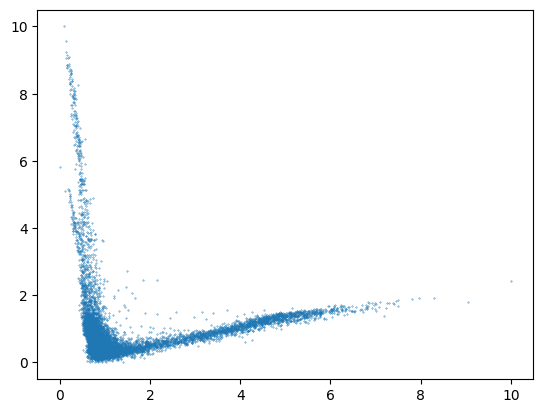

In [14]:
#plot for 2d

colors = []
colors += cm.get_cmap("Set3").colors
colors += cm.get_cmap("Set2").colors
my_cmap = ListedColormap(colors)
#print(my_cmap)
plt.rcParams.update(plt.rcParamsDefault)
# plt.scatter(embeddings[:, 0], embeddings[:, 1], c =y.astype(int),cmap="Spectral",  s = .1)
plt.scatter(embeddings[:, 0], embeddings[:, 1],cmap="Spectral",  s = .1)
plt.show()